In [11]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [26]:
learning_rate = 0.001
inputs_ = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets')

### Encoder
conv1 = tf.layers.conv2d(inputs=inputs_, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32
maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=(2,2), strides=(2,2), padding='same')
# Now 14x14x32
conv2 = tf.layers.conv2d(inputs=maxpool1, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
maxpool2 = tf.layers.max_pooling2d(conv2, pool_size=(2,2), strides=(2,2), padding='same')
# Now 7x7x32
conv3 = tf.layers.conv2d(inputs=maxpool2, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
encoded = tf.layers.max_pooling2d(conv3, pool_size=(2,2), strides=(2,2), padding='same')
# Now 4x4x16

### Decoder
upsample1 = tf.image.resize_images(encoded, size=(7,7), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 7x7x16
conv4 = tf.layers.conv2d(inputs=upsample1, filters=16, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 7x7x16
upsample2 = tf.image.resize_images(conv4, size=(14,14), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 14x14x16
conv5 = tf.layers.conv2d(inputs=upsample2, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 14x14x32
upsample3 = tf.image.resize_images(conv5, size=(28,28), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# Now 28x28x32
conv6 = tf.layers.conv2d(inputs=upsample3, filters=32, kernel_size=(3,3), padding='same', activation=tf.nn.relu)
# Now 28x28x32

logits = tf.layers.conv2d(inputs=conv6, filters=1, kernel_size=(3,3), padding='same', activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded = tf.nn.sigmoid(logits)

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)

# Get cost and define the optimizer
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [18]:
sess = tf.Session()

In [30]:
epochs = 10
batch_size = 100
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs_: noisy_imgs,
                                                         targets_: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/10... Training loss: 0.6836
Epoch: 1/10... Training loss: 0.6552
Epoch: 1/10... Training loss: 0.6168
Epoch: 1/10... Training loss: 0.5689
Epoch: 1/10... Training loss: 0.5173
Epoch: 1/10... Training loss: 0.4732
Epoch: 1/10... Training loss: 0.5110
Epoch: 1/10... Training loss: 0.5080
Epoch: 1/10... Training loss: 0.5036
Epoch: 1/10... Training loss: 0.4622
Epoch: 1/10... Training loss: 0.4342
Epoch: 1/10... Training loss: 0.4363
Epoch: 1/10... Training loss: 0.4339
Epoch: 1/10... Training loss: 0.4157
Epoch: 1/10... Training loss: 0.4083
Epoch: 1/10... Training loss: 0.3912
Epoch: 1/10... Training loss: 0.3755
Epoch: 1/10... Training loss: 0.3676
Epoch: 1/10... Training loss: 0.3640
Epoch: 1/10... Training loss: 0.3431
Epoch: 1/10... Training loss: 0.3225
Epoch: 1/10... Training loss: 0.3152
Epoch: 1/10... Training loss: 0.3045
Epoch: 1/10... Training loss: 0.3009
Epoch: 1/10... Training loss: 0.2854
Epoch: 1/10... Training loss: 0.2922
Epoch: 1/10... Training loss: 0.2835
E

Epoch: 1/10... Training loss: 0.1817
Epoch: 1/10... Training loss: 0.1770
Epoch: 1/10... Training loss: 0.1775
Epoch: 1/10... Training loss: 0.1825
Epoch: 1/10... Training loss: 0.1772
Epoch: 1/10... Training loss: 0.1723
Epoch: 1/10... Training loss: 0.1788
Epoch: 1/10... Training loss: 0.1757
Epoch: 1/10... Training loss: 0.1811
Epoch: 1/10... Training loss: 0.1809
Epoch: 1/10... Training loss: 0.1819
Epoch: 1/10... Training loss: 0.1850
Epoch: 1/10... Training loss: 0.1771
Epoch: 1/10... Training loss: 0.1763
Epoch: 1/10... Training loss: 0.1840
Epoch: 1/10... Training loss: 0.1686
Epoch: 1/10... Training loss: 0.1782
Epoch: 1/10... Training loss: 0.1716
Epoch: 1/10... Training loss: 0.1761
Epoch: 1/10... Training loss: 0.1728
Epoch: 1/10... Training loss: 0.1753
Epoch: 1/10... Training loss: 0.1742
Epoch: 1/10... Training loss: 0.1729
Epoch: 1/10... Training loss: 0.1781
Epoch: 1/10... Training loss: 0.1739
Epoch: 1/10... Training loss: 0.1686
Epoch: 1/10... Training loss: 0.1637
E

Epoch: 1/10... Training loss: 0.1526
Epoch: 1/10... Training loss: 0.1555
Epoch: 1/10... Training loss: 0.1526
Epoch: 1/10... Training loss: 0.1563
Epoch: 1/10... Training loss: 0.1511
Epoch: 1/10... Training loss: 0.1484
Epoch: 1/10... Training loss: 0.1524
Epoch: 1/10... Training loss: 0.1611
Epoch: 1/10... Training loss: 0.1577
Epoch: 1/10... Training loss: 0.1452
Epoch: 1/10... Training loss: 0.1558
Epoch: 1/10... Training loss: 0.1561
Epoch: 1/10... Training loss: 0.1563
Epoch: 1/10... Training loss: 0.1580
Epoch: 1/10... Training loss: 0.1483
Epoch: 1/10... Training loss: 0.1550
Epoch: 1/10... Training loss: 0.1473
Epoch: 1/10... Training loss: 0.1517
Epoch: 1/10... Training loss: 0.1484
Epoch: 1/10... Training loss: 0.1528
Epoch: 1/10... Training loss: 0.1520
Epoch: 1/10... Training loss: 0.1588
Epoch: 1/10... Training loss: 0.1523
Epoch: 1/10... Training loss: 0.1542
Epoch: 1/10... Training loss: 0.1572
Epoch: 1/10... Training loss: 0.1522
Epoch: 1/10... Training loss: 0.1587
E

Epoch: 2/10... Training loss: 0.1385
Epoch: 2/10... Training loss: 0.1409
Epoch: 2/10... Training loss: 0.1494
Epoch: 2/10... Training loss: 0.1450
Epoch: 2/10... Training loss: 0.1368
Epoch: 2/10... Training loss: 0.1396
Epoch: 2/10... Training loss: 0.1428
Epoch: 2/10... Training loss: 0.1425
Epoch: 2/10... Training loss: 0.1441
Epoch: 2/10... Training loss: 0.1452
Epoch: 2/10... Training loss: 0.1395
Epoch: 2/10... Training loss: 0.1451
Epoch: 2/10... Training loss: 0.1468
Epoch: 2/10... Training loss: 0.1501
Epoch: 2/10... Training loss: 0.1403
Epoch: 2/10... Training loss: 0.1491
Epoch: 2/10... Training loss: 0.1406
Epoch: 2/10... Training loss: 0.1437
Epoch: 2/10... Training loss: 0.1405
Epoch: 2/10... Training loss: 0.1368
Epoch: 2/10... Training loss: 0.1421
Epoch: 2/10... Training loss: 0.1467
Epoch: 2/10... Training loss: 0.1424
Epoch: 2/10... Training loss: 0.1444
Epoch: 2/10... Training loss: 0.1435
Epoch: 2/10... Training loss: 0.1418
Epoch: 2/10... Training loss: 0.1372
E

Epoch: 2/10... Training loss: 0.1459
Epoch: 2/10... Training loss: 0.1281
Epoch: 2/10... Training loss: 0.1366
Epoch: 2/10... Training loss: 0.1407
Epoch: 2/10... Training loss: 0.1446
Epoch: 2/10... Training loss: 0.1363
Epoch: 2/10... Training loss: 0.1385
Epoch: 2/10... Training loss: 0.1372
Epoch: 2/10... Training loss: 0.1370
Epoch: 2/10... Training loss: 0.1347
Epoch: 2/10... Training loss: 0.1446
Epoch: 2/10... Training loss: 0.1375
Epoch: 2/10... Training loss: 0.1349
Epoch: 2/10... Training loss: 0.1377
Epoch: 2/10... Training loss: 0.1353
Epoch: 2/10... Training loss: 0.1374
Epoch: 2/10... Training loss: 0.1389
Epoch: 2/10... Training loss: 0.1346
Epoch: 2/10... Training loss: 0.1354
Epoch: 2/10... Training loss: 0.1378
Epoch: 2/10... Training loss: 0.1379
Epoch: 2/10... Training loss: 0.1309
Epoch: 2/10... Training loss: 0.1367
Epoch: 2/10... Training loss: 0.1348
Epoch: 2/10... Training loss: 0.1342
Epoch: 2/10... Training loss: 0.1342
Epoch: 2/10... Training loss: 0.1419
E

Epoch: 2/10... Training loss: 0.1309
Epoch: 2/10... Training loss: 0.1322
Epoch: 2/10... Training loss: 0.1363
Epoch: 2/10... Training loss: 0.1301
Epoch: 2/10... Training loss: 0.1352
Epoch: 2/10... Training loss: 0.1306
Epoch: 2/10... Training loss: 0.1312
Epoch: 2/10... Training loss: 0.1243
Epoch: 2/10... Training loss: 0.1348
Epoch: 2/10... Training loss: 0.1337
Epoch: 2/10... Training loss: 0.1348
Epoch: 2/10... Training loss: 0.1390
Epoch: 2/10... Training loss: 0.1328
Epoch: 2/10... Training loss: 0.1292
Epoch: 2/10... Training loss: 0.1280
Epoch: 2/10... Training loss: 0.1352
Epoch: 2/10... Training loss: 0.1244
Epoch: 2/10... Training loss: 0.1303
Epoch: 2/10... Training loss: 0.1317
Epoch: 2/10... Training loss: 0.1336
Epoch: 2/10... Training loss: 0.1270
Epoch: 2/10... Training loss: 0.1269
Epoch: 2/10... Training loss: 0.1286
Epoch: 2/10... Training loss: 0.1326
Epoch: 2/10... Training loss: 0.1312
Epoch: 2/10... Training loss: 0.1310
Epoch: 2/10... Training loss: 0.1260
E

Epoch: 3/10... Training loss: 0.1291
Epoch: 3/10... Training loss: 0.1252
Epoch: 3/10... Training loss: 0.1307
Epoch: 3/10... Training loss: 0.1250
Epoch: 3/10... Training loss: 0.1317
Epoch: 3/10... Training loss: 0.1268
Epoch: 3/10... Training loss: 0.1196
Epoch: 3/10... Training loss: 0.1232
Epoch: 3/10... Training loss: 0.1248
Epoch: 3/10... Training loss: 0.1223
Epoch: 3/10... Training loss: 0.1332
Epoch: 3/10... Training loss: 0.1332
Epoch: 3/10... Training loss: 0.1305
Epoch: 3/10... Training loss: 0.1267
Epoch: 3/10... Training loss: 0.1297
Epoch: 3/10... Training loss: 0.1224
Epoch: 3/10... Training loss: 0.1312
Epoch: 3/10... Training loss: 0.1299
Epoch: 3/10... Training loss: 0.1213
Epoch: 3/10... Training loss: 0.1252
Epoch: 3/10... Training loss: 0.1270
Epoch: 3/10... Training loss: 0.1300
Epoch: 3/10... Training loss: 0.1335
Epoch: 3/10... Training loss: 0.1258
Epoch: 3/10... Training loss: 0.1301
Epoch: 3/10... Training loss: 0.1325
Epoch: 3/10... Training loss: 0.1312
E

Epoch: 3/10... Training loss: 0.1245
Epoch: 3/10... Training loss: 0.1242
Epoch: 3/10... Training loss: 0.1228
Epoch: 3/10... Training loss: 0.1307
Epoch: 3/10... Training loss: 0.1237
Epoch: 3/10... Training loss: 0.1223
Epoch: 3/10... Training loss: 0.1232
Epoch: 3/10... Training loss: 0.1324
Epoch: 3/10... Training loss: 0.1326
Epoch: 3/10... Training loss: 0.1278
Epoch: 3/10... Training loss: 0.1231
Epoch: 3/10... Training loss: 0.1232
Epoch: 3/10... Training loss: 0.1261
Epoch: 3/10... Training loss: 0.1240
Epoch: 3/10... Training loss: 0.1238
Epoch: 3/10... Training loss: 0.1295
Epoch: 3/10... Training loss: 0.1262
Epoch: 3/10... Training loss: 0.1253
Epoch: 3/10... Training loss: 0.1301
Epoch: 3/10... Training loss: 0.1266
Epoch: 3/10... Training loss: 0.1304
Epoch: 3/10... Training loss: 0.1278
Epoch: 3/10... Training loss: 0.1261
Epoch: 3/10... Training loss: 0.1266
Epoch: 3/10... Training loss: 0.1218
Epoch: 3/10... Training loss: 0.1261
Epoch: 3/10... Training loss: 0.1256
E

Epoch: 3/10... Training loss: 0.1223
Epoch: 3/10... Training loss: 0.1287
Epoch: 3/10... Training loss: 0.1260
Epoch: 3/10... Training loss: 0.1168
Epoch: 3/10... Training loss: 0.1186
Epoch: 3/10... Training loss: 0.1224
Epoch: 3/10... Training loss: 0.1261
Epoch: 3/10... Training loss: 0.1192
Epoch: 3/10... Training loss: 0.1176
Epoch: 3/10... Training loss: 0.1259
Epoch: 3/10... Training loss: 0.1249
Epoch: 3/10... Training loss: 0.1186
Epoch: 3/10... Training loss: 0.1251
Epoch: 3/10... Training loss: 0.1232
Epoch: 3/10... Training loss: 0.1301
Epoch: 3/10... Training loss: 0.1230
Epoch: 3/10... Training loss: 0.1189
Epoch: 3/10... Training loss: 0.1155
Epoch: 3/10... Training loss: 0.1251
Epoch: 3/10... Training loss: 0.1272
Epoch: 3/10... Training loss: 0.1222
Epoch: 3/10... Training loss: 0.1174
Epoch: 3/10... Training loss: 0.1215
Epoch: 3/10... Training loss: 0.1253
Epoch: 4/10... Training loss: 0.1267
Epoch: 4/10... Training loss: 0.1274
Epoch: 4/10... Training loss: 0.1246
E

Epoch: 4/10... Training loss: 0.1179
Epoch: 4/10... Training loss: 0.1254
Epoch: 4/10... Training loss: 0.1205
Epoch: 4/10... Training loss: 0.1225
Epoch: 4/10... Training loss: 0.1204
Epoch: 4/10... Training loss: 0.1166
Epoch: 4/10... Training loss: 0.1215
Epoch: 4/10... Training loss: 0.1258
Epoch: 4/10... Training loss: 0.1223
Epoch: 4/10... Training loss: 0.1218
Epoch: 4/10... Training loss: 0.1241
Epoch: 4/10... Training loss: 0.1217
Epoch: 4/10... Training loss: 0.1114
Epoch: 4/10... Training loss: 0.1230
Epoch: 4/10... Training loss: 0.1125
Epoch: 4/10... Training loss: 0.1240
Epoch: 4/10... Training loss: 0.1173
Epoch: 4/10... Training loss: 0.1203
Epoch: 4/10... Training loss: 0.1237
Epoch: 4/10... Training loss: 0.1235
Epoch: 4/10... Training loss: 0.1212
Epoch: 4/10... Training loss: 0.1188
Epoch: 4/10... Training loss: 0.1200
Epoch: 4/10... Training loss: 0.1251
Epoch: 4/10... Training loss: 0.1231
Epoch: 4/10... Training loss: 0.1176
Epoch: 4/10... Training loss: 0.1224
E

Epoch: 4/10... Training loss: 0.1191
Epoch: 4/10... Training loss: 0.1206
Epoch: 4/10... Training loss: 0.1196
Epoch: 4/10... Training loss: 0.1201
Epoch: 4/10... Training loss: 0.1236
Epoch: 4/10... Training loss: 0.1182
Epoch: 4/10... Training loss: 0.1204
Epoch: 4/10... Training loss: 0.1231
Epoch: 4/10... Training loss: 0.1183
Epoch: 4/10... Training loss: 0.1158
Epoch: 4/10... Training loss: 0.1210
Epoch: 4/10... Training loss: 0.1178
Epoch: 4/10... Training loss: 0.1235
Epoch: 4/10... Training loss: 0.1172
Epoch: 4/10... Training loss: 0.1233
Epoch: 4/10... Training loss: 0.1199
Epoch: 4/10... Training loss: 0.1152
Epoch: 4/10... Training loss: 0.1156
Epoch: 4/10... Training loss: 0.1202
Epoch: 4/10... Training loss: 0.1174
Epoch: 4/10... Training loss: 0.1150
Epoch: 4/10... Training loss: 0.1147
Epoch: 4/10... Training loss: 0.1150
Epoch: 4/10... Training loss: 0.1207
Epoch: 4/10... Training loss: 0.1190
Epoch: 4/10... Training loss: 0.1222
Epoch: 4/10... Training loss: 0.1178
E

Epoch: 5/10... Training loss: 0.1100
Epoch: 5/10... Training loss: 0.1205
Epoch: 5/10... Training loss: 0.1157
Epoch: 5/10... Training loss: 0.1172
Epoch: 5/10... Training loss: 0.1247
Epoch: 5/10... Training loss: 0.1178
Epoch: 5/10... Training loss: 0.1155
Epoch: 5/10... Training loss: 0.1234
Epoch: 5/10... Training loss: 0.1182
Epoch: 5/10... Training loss: 0.1268
Epoch: 5/10... Training loss: 0.1180
Epoch: 5/10... Training loss: 0.1174
Epoch: 5/10... Training loss: 0.1147
Epoch: 5/10... Training loss: 0.1189
Epoch: 5/10... Training loss: 0.1197
Epoch: 5/10... Training loss: 0.1201
Epoch: 5/10... Training loss: 0.1152
Epoch: 5/10... Training loss: 0.1171
Epoch: 5/10... Training loss: 0.1160
Epoch: 5/10... Training loss: 0.1251
Epoch: 5/10... Training loss: 0.1169
Epoch: 5/10... Training loss: 0.1209
Epoch: 5/10... Training loss: 0.1217
Epoch: 5/10... Training loss: 0.1175
Epoch: 5/10... Training loss: 0.1147
Epoch: 5/10... Training loss: 0.1224
Epoch: 5/10... Training loss: 0.1177
E

Epoch: 5/10... Training loss: 0.1180
Epoch: 5/10... Training loss: 0.1174
Epoch: 5/10... Training loss: 0.1160
Epoch: 5/10... Training loss: 0.1171
Epoch: 5/10... Training loss: 0.1164
Epoch: 5/10... Training loss: 0.1229
Epoch: 5/10... Training loss: 0.1136
Epoch: 5/10... Training loss: 0.1186
Epoch: 5/10... Training loss: 0.1105
Epoch: 5/10... Training loss: 0.1150
Epoch: 5/10... Training loss: 0.1158
Epoch: 5/10... Training loss: 0.1090
Epoch: 5/10... Training loss: 0.1203
Epoch: 5/10... Training loss: 0.1197
Epoch: 5/10... Training loss: 0.1130
Epoch: 5/10... Training loss: 0.1172
Epoch: 5/10... Training loss: 0.1165
Epoch: 5/10... Training loss: 0.1144
Epoch: 5/10... Training loss: 0.1205
Epoch: 5/10... Training loss: 0.1167
Epoch: 5/10... Training loss: 0.1156
Epoch: 5/10... Training loss: 0.1201
Epoch: 5/10... Training loss: 0.1239
Epoch: 5/10... Training loss: 0.1136
Epoch: 5/10... Training loss: 0.1237
Epoch: 5/10... Training loss: 0.1181
Epoch: 5/10... Training loss: 0.1174
E

Epoch: 5/10... Training loss: 0.1190
Epoch: 5/10... Training loss: 0.1162
Epoch: 5/10... Training loss: 0.1146
Epoch: 5/10... Training loss: 0.1193
Epoch: 5/10... Training loss: 0.1182
Epoch: 5/10... Training loss: 0.1150
Epoch: 5/10... Training loss: 0.1174
Epoch: 5/10... Training loss: 0.1147
Epoch: 5/10... Training loss: 0.1154
Epoch: 5/10... Training loss: 0.1106
Epoch: 5/10... Training loss: 0.1100
Epoch: 5/10... Training loss: 0.1174
Epoch: 5/10... Training loss: 0.1163
Epoch: 5/10... Training loss: 0.1147
Epoch: 5/10... Training loss: 0.1200
Epoch: 5/10... Training loss: 0.1132
Epoch: 5/10... Training loss: 0.1154
Epoch: 5/10... Training loss: 0.1127
Epoch: 5/10... Training loss: 0.1166
Epoch: 5/10... Training loss: 0.1212
Epoch: 5/10... Training loss: 0.1179
Epoch: 5/10... Training loss: 0.1177
Epoch: 5/10... Training loss: 0.1164
Epoch: 5/10... Training loss: 0.1142
Epoch: 5/10... Training loss: 0.1094
Epoch: 5/10... Training loss: 0.1142
Epoch: 5/10... Training loss: 0.1207
E

Epoch: 6/10... Training loss: 0.1163
Epoch: 6/10... Training loss: 0.1163
Epoch: 6/10... Training loss: 0.1200
Epoch: 6/10... Training loss: 0.1153
Epoch: 6/10... Training loss: 0.1127
Epoch: 6/10... Training loss: 0.1186
Epoch: 6/10... Training loss: 0.1163
Epoch: 6/10... Training loss: 0.1153
Epoch: 6/10... Training loss: 0.1133
Epoch: 6/10... Training loss: 0.1133
Epoch: 6/10... Training loss: 0.1178
Epoch: 6/10... Training loss: 0.1198
Epoch: 6/10... Training loss: 0.1194
Epoch: 6/10... Training loss: 0.1145
Epoch: 6/10... Training loss: 0.1163
Epoch: 6/10... Training loss: 0.1096
Epoch: 6/10... Training loss: 0.1177
Epoch: 6/10... Training loss: 0.1144
Epoch: 6/10... Training loss: 0.1155
Epoch: 6/10... Training loss: 0.1203
Epoch: 6/10... Training loss: 0.1116
Epoch: 6/10... Training loss: 0.1143
Epoch: 6/10... Training loss: 0.1158
Epoch: 6/10... Training loss: 0.1231
Epoch: 6/10... Training loss: 0.1157
Epoch: 6/10... Training loss: 0.1168
Epoch: 6/10... Training loss: 0.1122
E

Epoch: 6/10... Training loss: 0.1115
Epoch: 6/10... Training loss: 0.1112
Epoch: 6/10... Training loss: 0.1098
Epoch: 6/10... Training loss: 0.1179
Epoch: 6/10... Training loss: 0.1122
Epoch: 6/10... Training loss: 0.1147
Epoch: 6/10... Training loss: 0.1173
Epoch: 6/10... Training loss: 0.1144
Epoch: 6/10... Training loss: 0.1137
Epoch: 6/10... Training loss: 0.1139
Epoch: 6/10... Training loss: 0.1136
Epoch: 6/10... Training loss: 0.1187
Epoch: 6/10... Training loss: 0.1127
Epoch: 6/10... Training loss: 0.1123
Epoch: 6/10... Training loss: 0.1137
Epoch: 6/10... Training loss: 0.1175
Epoch: 6/10... Training loss: 0.1146
Epoch: 6/10... Training loss: 0.1124
Epoch: 6/10... Training loss: 0.1126
Epoch: 6/10... Training loss: 0.1184
Epoch: 6/10... Training loss: 0.1137
Epoch: 6/10... Training loss: 0.1142
Epoch: 6/10... Training loss: 0.1182
Epoch: 6/10... Training loss: 0.1175
Epoch: 6/10... Training loss: 0.1084
Epoch: 6/10... Training loss: 0.1082
Epoch: 6/10... Training loss: 0.1186
E

Epoch: 6/10... Training loss: 0.1080
Epoch: 6/10... Training loss: 0.1117
Epoch: 6/10... Training loss: 0.1114
Epoch: 6/10... Training loss: 0.1142
Epoch: 6/10... Training loss: 0.1139
Epoch: 6/10... Training loss: 0.1094
Epoch: 6/10... Training loss: 0.1150
Epoch: 6/10... Training loss: 0.1143
Epoch: 6/10... Training loss: 0.1162
Epoch: 6/10... Training loss: 0.1139
Epoch: 6/10... Training loss: 0.1096
Epoch: 6/10... Training loss: 0.1088
Epoch: 6/10... Training loss: 0.1099
Epoch: 6/10... Training loss: 0.1188
Epoch: 6/10... Training loss: 0.1100
Epoch: 6/10... Training loss: 0.1130
Epoch: 6/10... Training loss: 0.1154
Epoch: 6/10... Training loss: 0.1131
Epoch: 6/10... Training loss: 0.1131
Epoch: 6/10... Training loss: 0.1124
Epoch: 6/10... Training loss: 0.1074
Epoch: 6/10... Training loss: 0.1094
Epoch: 6/10... Training loss: 0.1152
Epoch: 6/10... Training loss: 0.1148
Epoch: 6/10... Training loss: 0.1119
Epoch: 6/10... Training loss: 0.1197
Epoch: 6/10... Training loss: 0.1133
E

Epoch: 7/10... Training loss: 0.1083
Epoch: 7/10... Training loss: 0.1096
Epoch: 7/10... Training loss: 0.1085
Epoch: 7/10... Training loss: 0.1123
Epoch: 7/10... Training loss: 0.1168
Epoch: 7/10... Training loss: 0.1070
Epoch: 7/10... Training loss: 0.1106
Epoch: 7/10... Training loss: 0.1109
Epoch: 7/10... Training loss: 0.1128
Epoch: 7/10... Training loss: 0.1112
Epoch: 7/10... Training loss: 0.1140
Epoch: 7/10... Training loss: 0.1137
Epoch: 7/10... Training loss: 0.1128
Epoch: 7/10... Training loss: 0.1146
Epoch: 7/10... Training loss: 0.1143
Epoch: 7/10... Training loss: 0.1134
Epoch: 7/10... Training loss: 0.1148
Epoch: 7/10... Training loss: 0.1092
Epoch: 7/10... Training loss: 0.1095
Epoch: 7/10... Training loss: 0.1114
Epoch: 7/10... Training loss: 0.1117
Epoch: 7/10... Training loss: 0.1126
Epoch: 7/10... Training loss: 0.1181
Epoch: 7/10... Training loss: 0.1089
Epoch: 7/10... Training loss: 0.1122
Epoch: 7/10... Training loss: 0.1110
Epoch: 7/10... Training loss: 0.1111
E

Epoch: 7/10... Training loss: 0.1104
Epoch: 7/10... Training loss: 0.1062
Epoch: 7/10... Training loss: 0.1101
Epoch: 7/10... Training loss: 0.1124
Epoch: 7/10... Training loss: 0.1091
Epoch: 7/10... Training loss: 0.1152
Epoch: 7/10... Training loss: 0.1158
Epoch: 7/10... Training loss: 0.1077
Epoch: 7/10... Training loss: 0.1112
Epoch: 7/10... Training loss: 0.1082
Epoch: 7/10... Training loss: 0.1109
Epoch: 7/10... Training loss: 0.1096
Epoch: 7/10... Training loss: 0.1101
Epoch: 7/10... Training loss: 0.1138
Epoch: 7/10... Training loss: 0.1134
Epoch: 7/10... Training loss: 0.1093
Epoch: 7/10... Training loss: 0.1104
Epoch: 7/10... Training loss: 0.1151
Epoch: 7/10... Training loss: 0.1143
Epoch: 7/10... Training loss: 0.1085
Epoch: 7/10... Training loss: 0.1182
Epoch: 7/10... Training loss: 0.1063
Epoch: 7/10... Training loss: 0.1187
Epoch: 7/10... Training loss: 0.1123
Epoch: 7/10... Training loss: 0.1151
Epoch: 7/10... Training loss: 0.1093
Epoch: 7/10... Training loss: 0.1094
E

Epoch: 8/10... Training loss: 0.1108
Epoch: 8/10... Training loss: 0.1122
Epoch: 8/10... Training loss: 0.1083
Epoch: 8/10... Training loss: 0.1125
Epoch: 8/10... Training loss: 0.1091
Epoch: 8/10... Training loss: 0.1146
Epoch: 8/10... Training loss: 0.1070
Epoch: 8/10... Training loss: 0.1087
Epoch: 8/10... Training loss: 0.1193
Epoch: 8/10... Training loss: 0.1077
Epoch: 8/10... Training loss: 0.1183
Epoch: 8/10... Training loss: 0.1149
Epoch: 8/10... Training loss: 0.1079
Epoch: 8/10... Training loss: 0.1132
Epoch: 8/10... Training loss: 0.1094
Epoch: 8/10... Training loss: 0.1103
Epoch: 8/10... Training loss: 0.1145
Epoch: 8/10... Training loss: 0.1093
Epoch: 8/10... Training loss: 0.1120
Epoch: 8/10... Training loss: 0.1104
Epoch: 8/10... Training loss: 0.1046
Epoch: 8/10... Training loss: 0.1103
Epoch: 8/10... Training loss: 0.1070
Epoch: 8/10... Training loss: 0.1095
Epoch: 8/10... Training loss: 0.1093
Epoch: 8/10... Training loss: 0.1107
Epoch: 8/10... Training loss: 0.1146
E

Epoch: 8/10... Training loss: 0.1081
Epoch: 8/10... Training loss: 0.1100
Epoch: 8/10... Training loss: 0.1121
Epoch: 8/10... Training loss: 0.1073
Epoch: 8/10... Training loss: 0.1095
Epoch: 8/10... Training loss: 0.1136
Epoch: 8/10... Training loss: 0.1115
Epoch: 8/10... Training loss: 0.1107
Epoch: 8/10... Training loss: 0.1048
Epoch: 8/10... Training loss: 0.1112
Epoch: 8/10... Training loss: 0.1092
Epoch: 8/10... Training loss: 0.1047
Epoch: 8/10... Training loss: 0.1128
Epoch: 8/10... Training loss: 0.1150
Epoch: 8/10... Training loss: 0.1096
Epoch: 8/10... Training loss: 0.1193
Epoch: 8/10... Training loss: 0.1086
Epoch: 8/10... Training loss: 0.1145
Epoch: 8/10... Training loss: 0.1163
Epoch: 8/10... Training loss: 0.1097
Epoch: 8/10... Training loss: 0.1153
Epoch: 8/10... Training loss: 0.1154
Epoch: 8/10... Training loss: 0.1112
Epoch: 8/10... Training loss: 0.1102
Epoch: 8/10... Training loss: 0.1078
Epoch: 8/10... Training loss: 0.1131
Epoch: 8/10... Training loss: 0.1102
E

Epoch: 8/10... Training loss: 0.1120
Epoch: 8/10... Training loss: 0.1135
Epoch: 8/10... Training loss: 0.1133
Epoch: 8/10... Training loss: 0.1098
Epoch: 8/10... Training loss: 0.1129
Epoch: 8/10... Training loss: 0.1024
Epoch: 8/10... Training loss: 0.1118
Epoch: 8/10... Training loss: 0.1104
Epoch: 8/10... Training loss: 0.1034
Epoch: 8/10... Training loss: 0.1104
Epoch: 8/10... Training loss: 0.1096
Epoch: 8/10... Training loss: 0.1106
Epoch: 8/10... Training loss: 0.1106
Epoch: 8/10... Training loss: 0.1060
Epoch: 8/10... Training loss: 0.1050
Epoch: 8/10... Training loss: 0.1084
Epoch: 8/10... Training loss: 0.1093
Epoch: 8/10... Training loss: 0.1122
Epoch: 8/10... Training loss: 0.1111
Epoch: 8/10... Training loss: 0.1070
Epoch: 8/10... Training loss: 0.1134
Epoch: 8/10... Training loss: 0.1090
Epoch: 8/10... Training loss: 0.1093
Epoch: 8/10... Training loss: 0.1069
Epoch: 8/10... Training loss: 0.1101
Epoch: 8/10... Training loss: 0.1101
Epoch: 8/10... Training loss: 0.1067
E

Epoch: 9/10... Training loss: 0.1087
Epoch: 9/10... Training loss: 0.1130
Epoch: 9/10... Training loss: 0.1118
Epoch: 9/10... Training loss: 0.1065
Epoch: 9/10... Training loss: 0.1102
Epoch: 9/10... Training loss: 0.1048
Epoch: 9/10... Training loss: 0.1084
Epoch: 9/10... Training loss: 0.1083
Epoch: 9/10... Training loss: 0.1155
Epoch: 9/10... Training loss: 0.1140
Epoch: 9/10... Training loss: 0.1090
Epoch: 9/10... Training loss: 0.1117
Epoch: 9/10... Training loss: 0.1122
Epoch: 9/10... Training loss: 0.1165
Epoch: 9/10... Training loss: 0.1119
Epoch: 9/10... Training loss: 0.1089
Epoch: 9/10... Training loss: 0.1116
Epoch: 9/10... Training loss: 0.1114
Epoch: 9/10... Training loss: 0.1059
Epoch: 9/10... Training loss: 0.1134
Epoch: 9/10... Training loss: 0.1049
Epoch: 9/10... Training loss: 0.1079
Epoch: 9/10... Training loss: 0.1076
Epoch: 9/10... Training loss: 0.1107
Epoch: 9/10... Training loss: 0.1131
Epoch: 9/10... Training loss: 0.1126
Epoch: 9/10... Training loss: 0.1060
E

Epoch: 9/10... Training loss: 0.1094
Epoch: 9/10... Training loss: 0.1152
Epoch: 9/10... Training loss: 0.1048
Epoch: 9/10... Training loss: 0.1082
Epoch: 9/10... Training loss: 0.1084
Epoch: 9/10... Training loss: 0.1103
Epoch: 9/10... Training loss: 0.1068
Epoch: 9/10... Training loss: 0.1089
Epoch: 9/10... Training loss: 0.1121
Epoch: 9/10... Training loss: 0.1075
Epoch: 9/10... Training loss: 0.1091
Epoch: 9/10... Training loss: 0.1075
Epoch: 9/10... Training loss: 0.1070
Epoch: 9/10... Training loss: 0.1103
Epoch: 9/10... Training loss: 0.1105
Epoch: 9/10... Training loss: 0.1100
Epoch: 9/10... Training loss: 0.1119
Epoch: 9/10... Training loss: 0.1064
Epoch: 9/10... Training loss: 0.1097
Epoch: 9/10... Training loss: 0.1051
Epoch: 9/10... Training loss: 0.1085
Epoch: 9/10... Training loss: 0.1142
Epoch: 9/10... Training loss: 0.1086
Epoch: 9/10... Training loss: 0.1055
Epoch: 9/10... Training loss: 0.1074
Epoch: 9/10... Training loss: 0.1090
Epoch: 9/10... Training loss: 0.1073
E

Epoch: 9/10... Training loss: 0.1131
Epoch: 9/10... Training loss: 0.1068
Epoch: 9/10... Training loss: 0.1091
Epoch: 9/10... Training loss: 0.1114
Epoch: 9/10... Training loss: 0.1090
Epoch: 9/10... Training loss: 0.1101
Epoch: 9/10... Training loss: 0.1083
Epoch: 9/10... Training loss: 0.1150
Epoch: 9/10... Training loss: 0.1112
Epoch: 9/10... Training loss: 0.1130
Epoch: 9/10... Training loss: 0.1063
Epoch: 9/10... Training loss: 0.1089
Epoch: 9/10... Training loss: 0.1029
Epoch: 9/10... Training loss: 0.1099
Epoch: 9/10... Training loss: 0.1037
Epoch: 9/10... Training loss: 0.1048
Epoch: 9/10... Training loss: 0.1042
Epoch: 9/10... Training loss: 0.1071
Epoch: 9/10... Training loss: 0.1126
Epoch: 9/10... Training loss: 0.1094
Epoch: 9/10... Training loss: 0.1092
Epoch: 9/10... Training loss: 0.1071
Epoch: 9/10... Training loss: 0.1100
Epoch: 9/10... Training loss: 0.1129
Epoch: 9/10... Training loss: 0.1009
Epoch: 9/10... Training loss: 0.1069
Epoch: 9/10... Training loss: 0.1115
E

Epoch: 10/10... Training loss: 0.1078
Epoch: 10/10... Training loss: 0.1072
Epoch: 10/10... Training loss: 0.1059
Epoch: 10/10... Training loss: 0.1061
Epoch: 10/10... Training loss: 0.1067
Epoch: 10/10... Training loss: 0.1052
Epoch: 10/10... Training loss: 0.1065
Epoch: 10/10... Training loss: 0.1104
Epoch: 10/10... Training loss: 0.1069
Epoch: 10/10... Training loss: 0.1055
Epoch: 10/10... Training loss: 0.1091
Epoch: 10/10... Training loss: 0.1100
Epoch: 10/10... Training loss: 0.1148
Epoch: 10/10... Training loss: 0.1097
Epoch: 10/10... Training loss: 0.1072
Epoch: 10/10... Training loss: 0.1084
Epoch: 10/10... Training loss: 0.1093
Epoch: 10/10... Training loss: 0.1136
Epoch: 10/10... Training loss: 0.1035
Epoch: 10/10... Training loss: 0.1121
Epoch: 10/10... Training loss: 0.1093
Epoch: 10/10... Training loss: 0.1120
Epoch: 10/10... Training loss: 0.1125
Epoch: 10/10... Training loss: 0.1094
Epoch: 10/10... Training loss: 0.1049
Epoch: 10/10... Training loss: 0.1071
Epoch: 10/10

Epoch: 10/10... Training loss: 0.1085
Epoch: 10/10... Training loss: 0.1098
Epoch: 10/10... Training loss: 0.1097
Epoch: 10/10... Training loss: 0.1068
Epoch: 10/10... Training loss: 0.1048
Epoch: 10/10... Training loss: 0.1068
Epoch: 10/10... Training loss: 0.1128
Epoch: 10/10... Training loss: 0.1096
Epoch: 10/10... Training loss: 0.1074
Epoch: 10/10... Training loss: 0.1071
Epoch: 10/10... Training loss: 0.1069
Epoch: 10/10... Training loss: 0.1048
Epoch: 10/10... Training loss: 0.1116
Epoch: 10/10... Training loss: 0.1067
Epoch: 10/10... Training loss: 0.1028
Epoch: 10/10... Training loss: 0.1127
Epoch: 10/10... Training loss: 0.1042
Epoch: 10/10... Training loss: 0.1096
Epoch: 10/10... Training loss: 0.1094
Epoch: 10/10... Training loss: 0.1022
Epoch: 10/10... Training loss: 0.1054
Epoch: 10/10... Training loss: 0.1086
Epoch: 10/10... Training loss: 0.1084
Epoch: 10/10... Training loss: 0.1144
Epoch: 10/10... Training loss: 0.1083
Epoch: 10/10... Training loss: 0.1113
Epoch: 10/10

Epoch: 10/10... Training loss: 0.1112
Epoch: 10/10... Training loss: 0.1066
Epoch: 10/10... Training loss: 0.1056
Epoch: 10/10... Training loss: 0.1069
Epoch: 10/10... Training loss: 0.1061
Epoch: 10/10... Training loss: 0.1064
Epoch: 10/10... Training loss: 0.1107
Epoch: 10/10... Training loss: 0.1072
Epoch: 10/10... Training loss: 0.1020
Epoch: 10/10... Training loss: 0.1095
Epoch: 10/10... Training loss: 0.1101
Epoch: 10/10... Training loss: 0.1111
Epoch: 10/10... Training loss: 0.1106


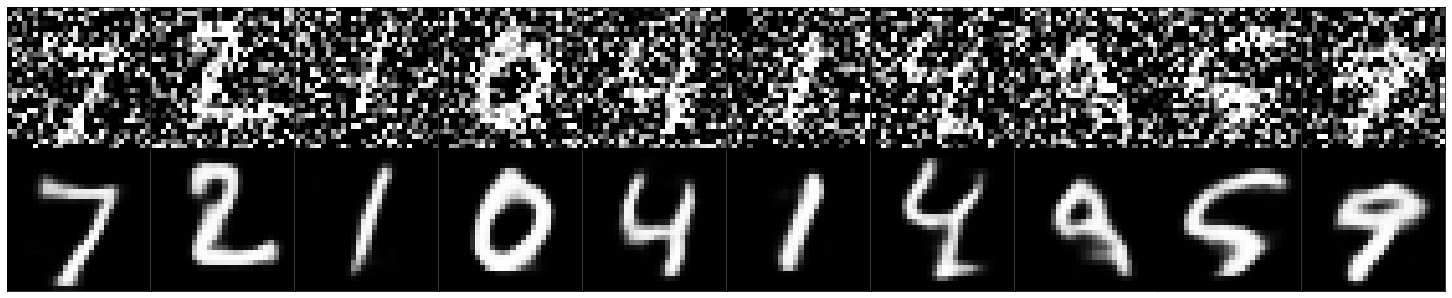

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + 0.6 * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)